### Importing

In [96]:
from sklearn.externals import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,precision_recall_fscore_support,precision_score,recall_score,confusion_matrix,auc,roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

### loading

In [7]:
X=joblib.load('sav_1/vsm.sav')
dataset=joblib.load('dataset_with_labels.sav')
y=np.array(dataset)[:,1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Grid search params

In [21]:
Cs = [0.001, 0.01, 0.1, 1, 10]
param_grid = {'C': Cs}
clf = LinearSVC()

### GridSearch

In [22]:
grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1)

### Fit

In [23]:
best_model = grid_search.fit(X_train, y_train)

c:\users\subhani\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### predict on X_test

In [51]:
y_pred = best_model.predict(X_test)

## Metrics

### Confusion matrix

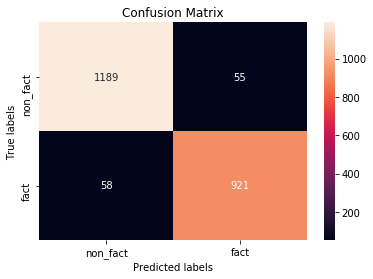

In [90]:
cm=confusion_matrix(y_test, best_model.predict(X_test))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='d'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['non_fact', 'fact']); ax.yaxis.set_ticklabels(['non_fact', 'fact']);

### F1_score

In [52]:
f1_score(y_test, y_pred, pos_label='1')

0.9421994884910486

In [57]:
# target_names = ['0','1']
# print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1244
           1       0.94      0.94      0.94       979

   micro avg       0.95      0.95      0.95      2223
   macro avg       0.95      0.95      0.95      2223
weighted avg       0.95      0.95      0.95      2223



In [63]:
precision_recall_fscore_support(y_test, y_pred, pos_label='1',warn_for=('precision', 'recall', 'f-score'))

(array([0.95348837, 0.94364754]),
 array([0.95578778, 0.94075587]),
 array([0.95463669, 0.94219949]),
 array([1244,  979], dtype=int64))

### Precision

In [71]:
precision_score(y_test, y_pred, pos_label='1')

0.9436475409836066

### Recall

In [74]:
recall_score(y_test, y_pred, pos_label='1')

0.940755873340143

### AUC_ROC curve

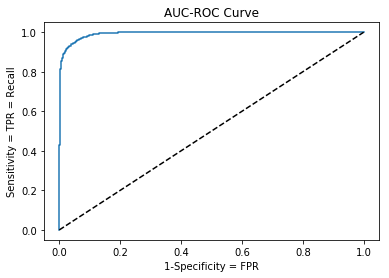

In [103]:
scores=best_model.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, scores, pos_label='1')
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('1-Specificity = FPR')
plt.ylabel("Sensitivity = TPR = Recall")
plt.title("AUC-ROC Curve")
plt.show()

In [68]:
print(list(y_test).count('0'),' ',list(y_test).count('1'))

1244   979
